In [64]:
import sys
sys.path.append("..")  # Adds the parent directory to the sys.path
import numpy as np
import cv2 as cv
from cake import cake
from matplotlib import pyplot as plt
import matplotlib.colors
from scipy import signal
from scipy.spatial.transform import Rotation as R
from cluster_half_shelfs_alpha import Half_shelf_cluster
from cluster_to_edge_pixel import contour_edge
from confectionery import Confectionery
from utitlity_functions import *
from scipy.spatial.transform import Rotation as R
import matplotlib as mpl
from matplotlib import cm
from particle_data_structure import ParticleDataStruct
import os
from matplotlib.patches import Ellipse
from matplotlib.patches import Arc
import matplotlib.patches as mpatches
import seaborn_image as isns
from matplotlib.lines import Line2D


In [16]:
folder_name="Gute_aufnahme_shortened"
koppenrath=Confectionery()


In [25]:
data_paths=os.listdir(os.path.join("../data",folder_name))
stream_string=np.load(os.path.join("../data",folder_name,"image_paths_smooth.npy"))
objs=[x for x in data_paths if "pos_data" in x]
objs_number=np.array([int(x[9:-4]) for x in objs])
indexing=np.argsort(objs_number)
objs=[np.load(os.path.join("../data",folder_name,objs[x])) for x in indexing]
obj_11=objs[11]

r_jps=int(np.floor(np.mean(obj_11[:,-1])))-1
im_smooth=[np.load("../"+x) for x in stream_string]

In [66]:
obj_im_sequence=[]
for i in range(obj_11.shape[0]):
    t=int(obj_11[i,0])
    y=round(obj_11[i,2])
    x=round(obj_11[i,1])
    obj_im_sequence.append(cv.cvtColor(im_smooth[t][y-r_jps:y+r_jps+1,x-r_jps:x+r_jps+1],cv.COLOR_BGR2GRAY))
obj_im_sequence=np.array(obj_im_sequence)


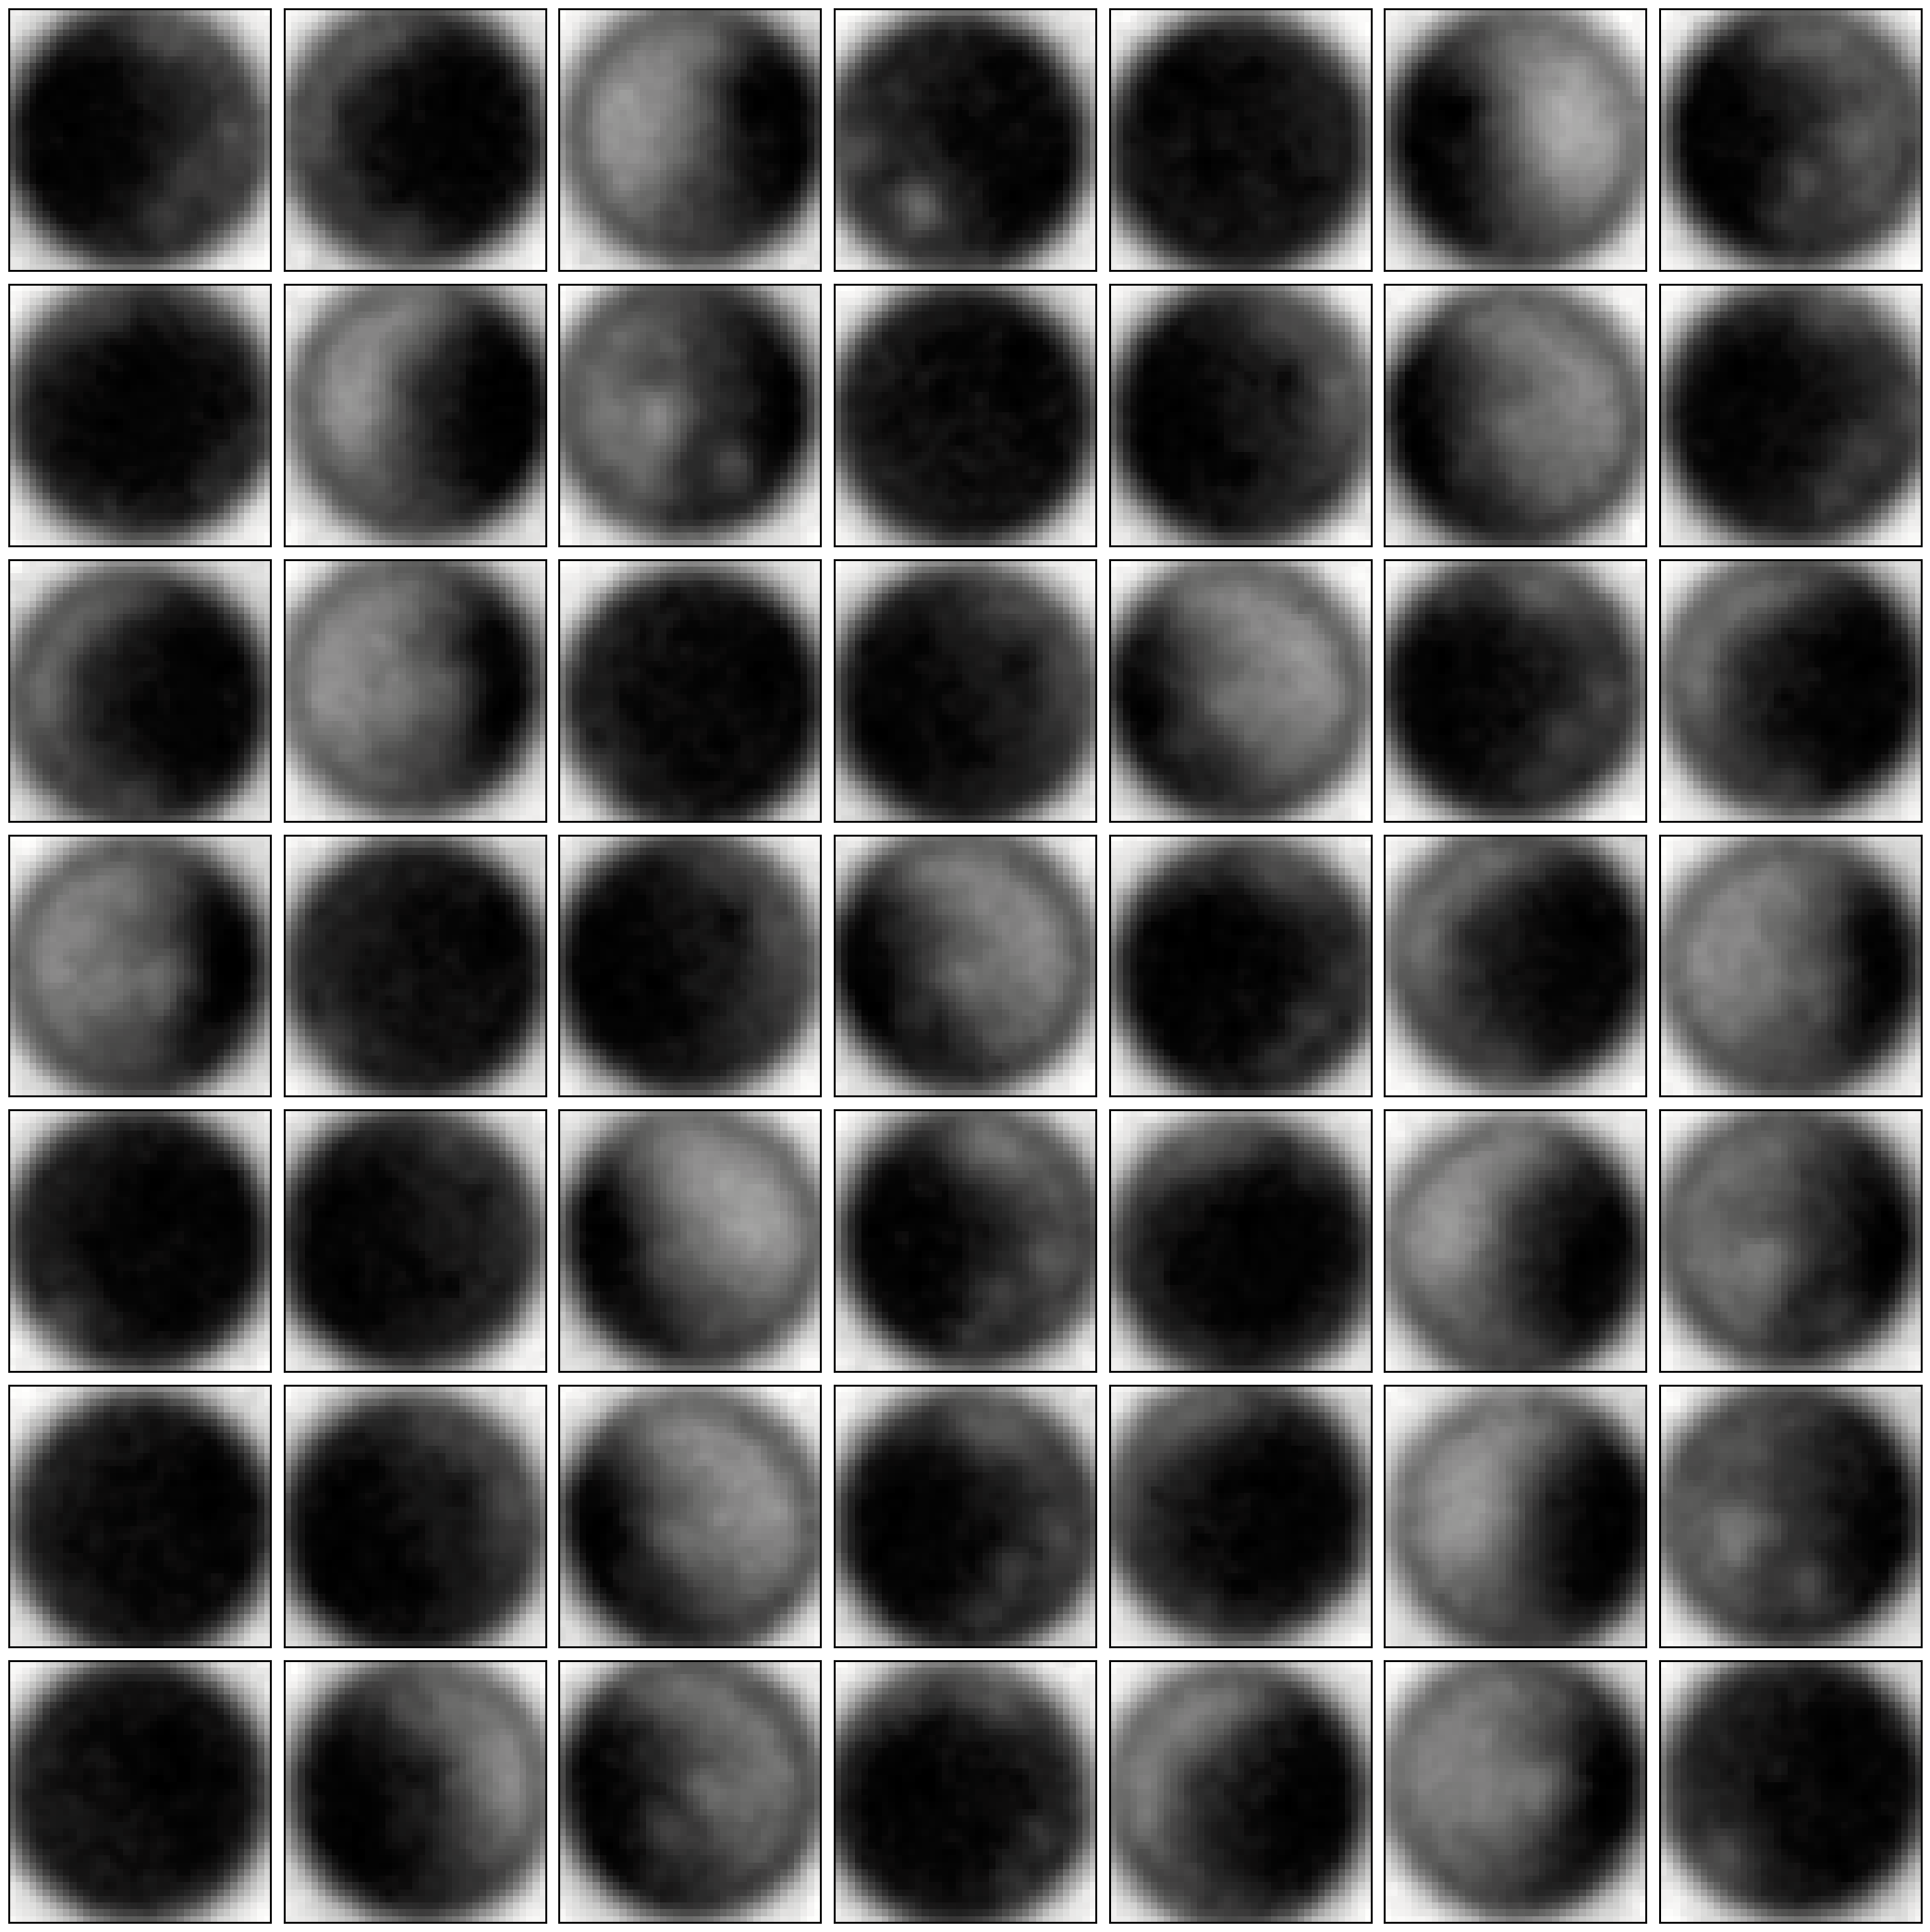

In [74]:
g =isns.ImageGrid([ obj_im_sequence[i,:,:] for i in range(0,obj_im_sequence.shape[0]-3,2)], col_wrap=7, cbar=False,cmap="gray")


# images with ellipse

In [86]:
im_ellipses=np.load("data/np_array_for_ellipses_11.npy")

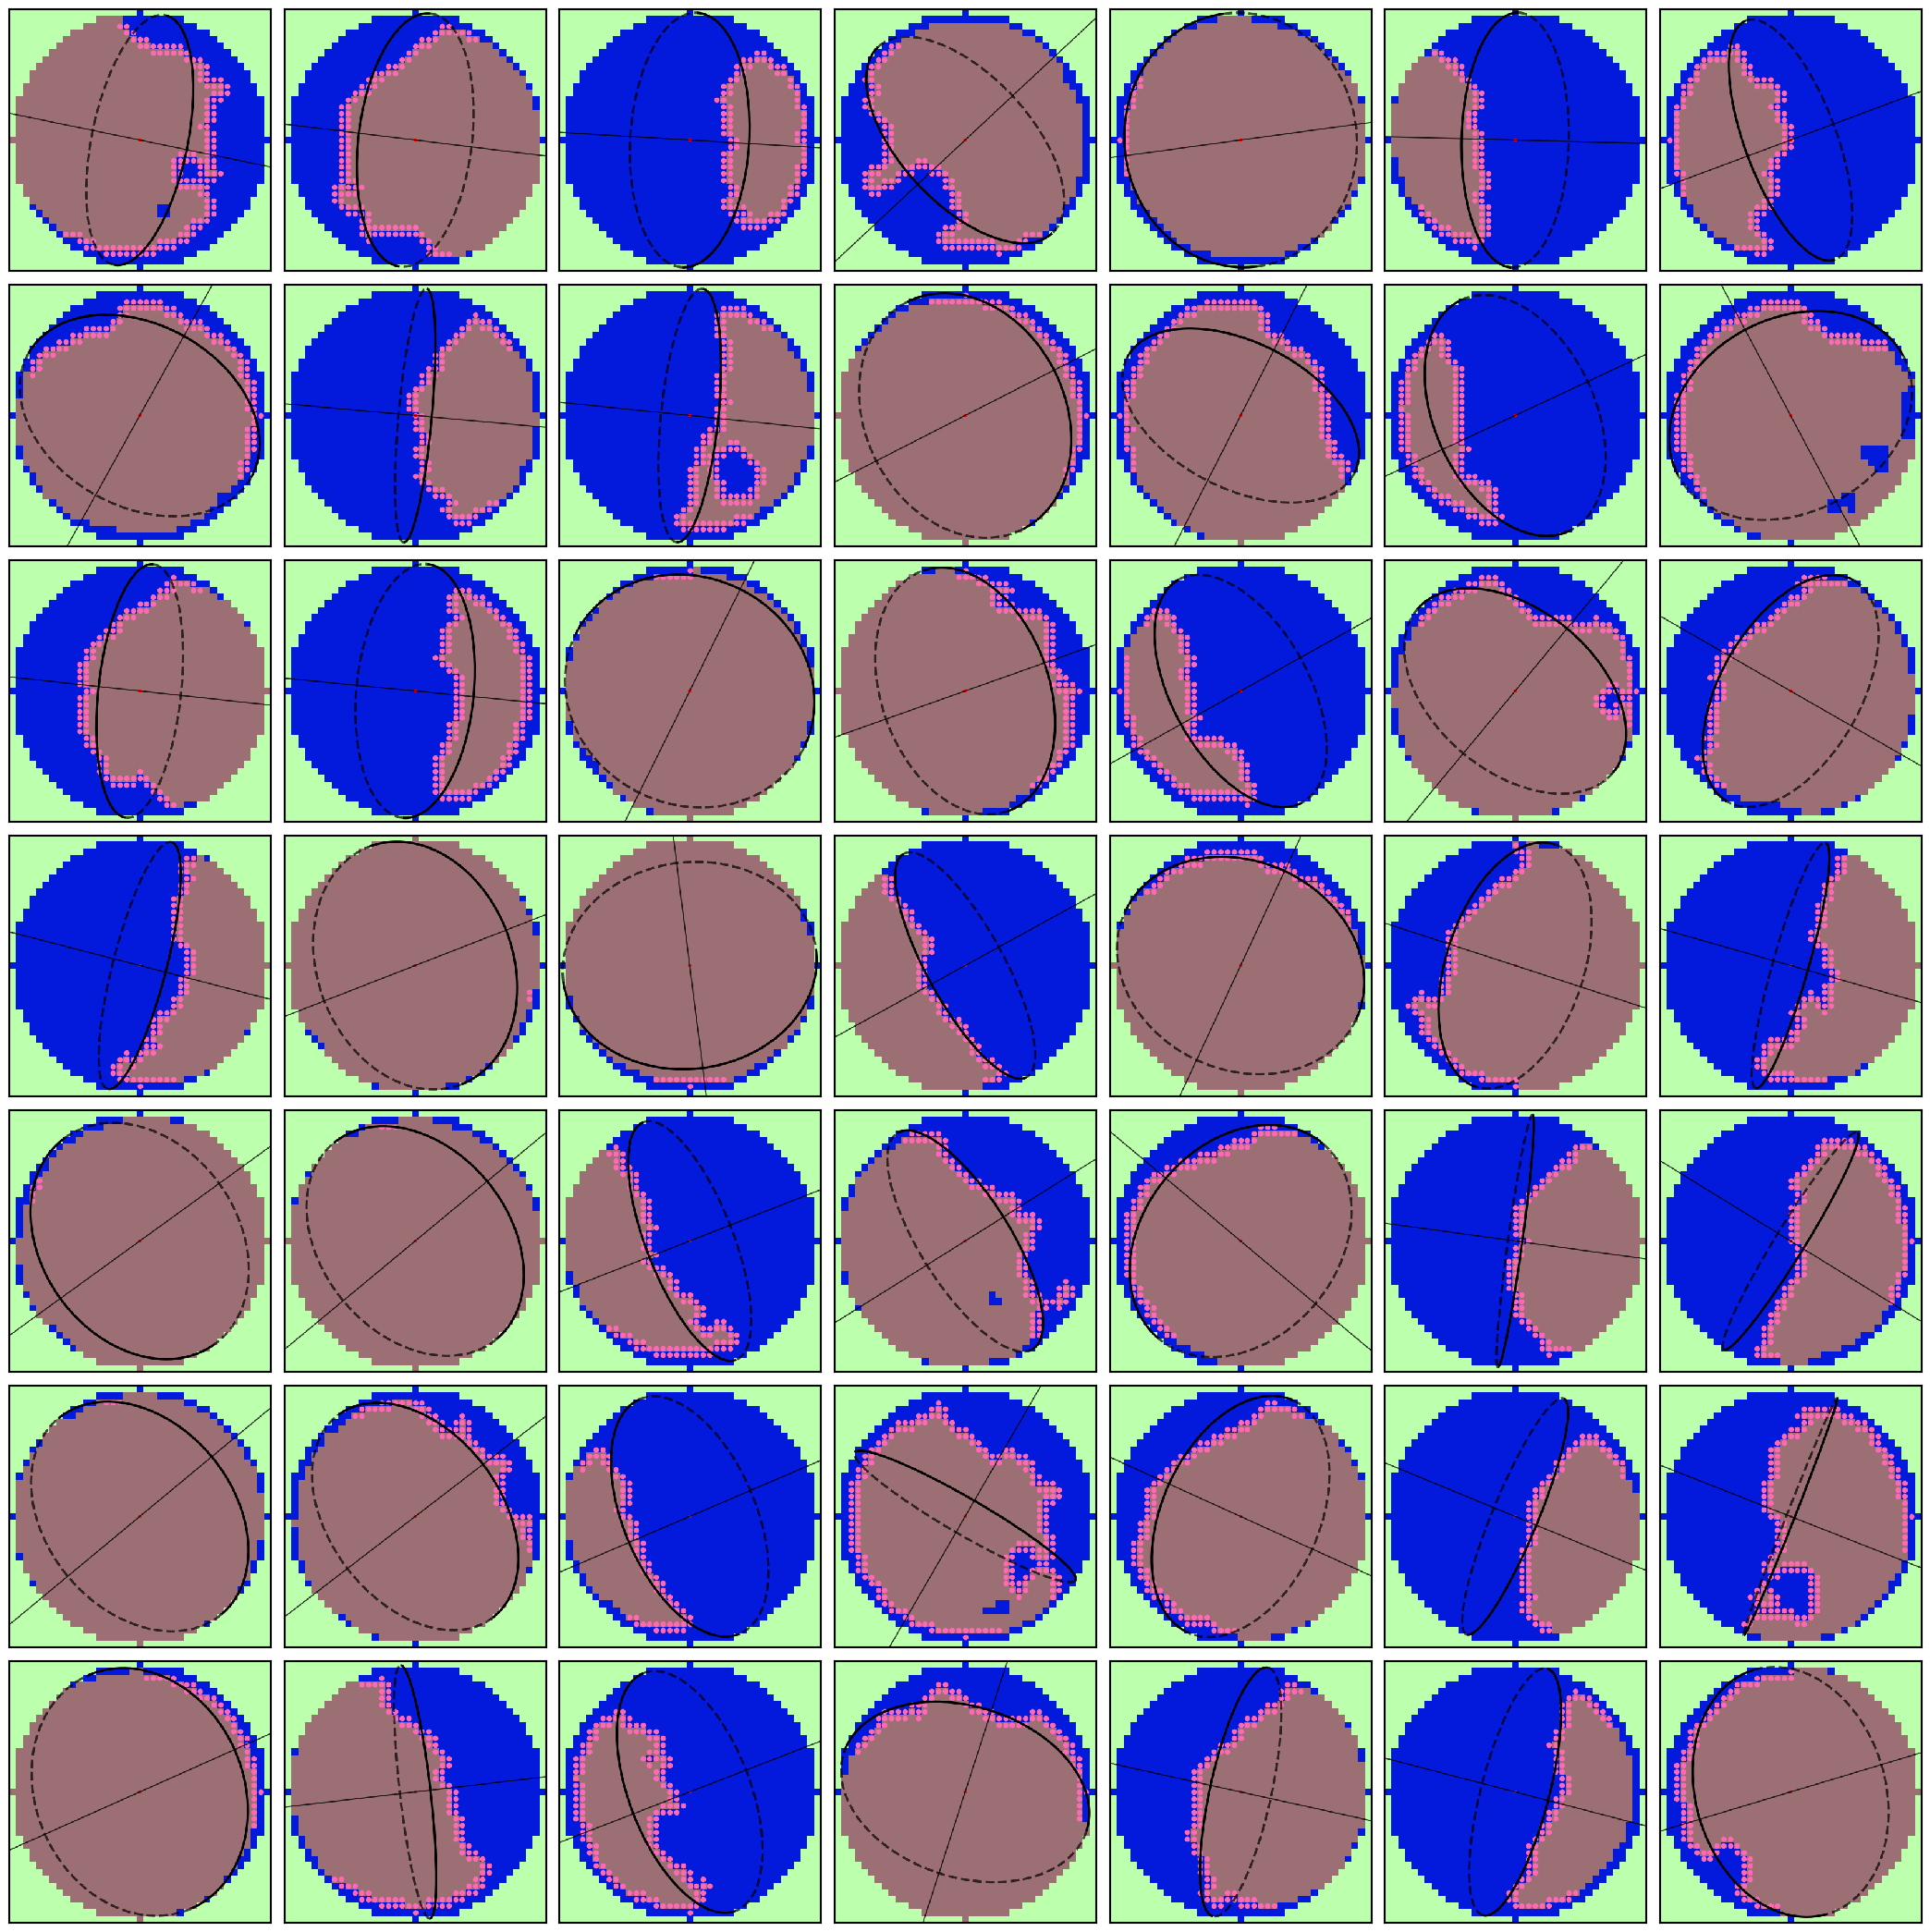

In [87]:
g =isns.ImageGrid([ im_ellipses[i,:,:] for i in range(0,im_ellipses.shape[0]-3,2)], col_wrap=7, cbar=False,cmap="gray")


/Users/Hoang_1/Desktop/Master_Arbeit/software/Janus_Particle_Tracking_long_video/venv/lib/python3.9/site-packages/seaborn_image/_grid.py:368: RuntimeWarning: The data inputed is a 2d array which contains a single image. It is recomended that you use `imgplot` instead of `ImageGrid`.
  warnings.warn(


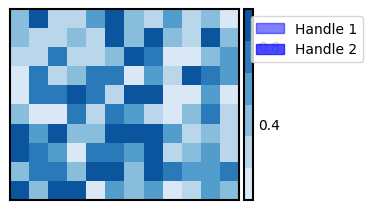

In [92]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create some example data
data = np.random.rand(10, 12)
cmap = ListedColormap(sns.color_palette("Blues"))

# Create a seaborn ImageGrid
grid = isns.ImageGrid(data, cmap=cmap)

# Add your custom handles and labels
handles = [plt.Rectangle((0,0),1,1, color='blue', alpha=0.5), 
           plt.Rectangle((0,0),1,1, color='blue', alpha=0.7)]
labels = ['Handle 1', 'Handle 2']

# Add a legend outside the ImageGrid
plt.legend(handles, labels, loc='upper left')

plt.show()